## Problem Statement to Establish Relationship between mpg and other Attributes :-

### Importing Packages :-

In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [4]:
df = pd.read_csv("auto-mpg.csv")

In [5]:
df.sample(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
379,36.0,4,98.0,70,2125,17.3,82,1,mercury lynx l
75,14.0,8,318.0,150,4077,14.0,72,1,plymouth satellite custom (sw)
370,31.0,4,112.0,85,2575,16.2,82,1,pontiac j2000 se hatchback
173,24.0,4,119.0,97,2545,17.0,75,3,datsun 710
45,18.0,6,258.0,110,2962,13.5,71,1,amc hornet sportabout (sw)
340,25.8,4,156.0,92,2620,14.4,81,1,dodge aries wagon (sw)
10,15.0,8,383.0,170,3563,10.0,70,1,dodge challenger se
86,14.0,8,304.0,150,3672,11.5,73,1,amc matador
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
106,12.0,8,350.0,180,4499,12.5,73,1,oldsmobile vista cruiser


In [6]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [7]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [8]:
df["horsepower"].value_counts()

150    22
90     20
88     19
110    18
100    17
75     14
95     14
105    12
70     12
67     12
65     10
97      9
85      9
80      7
145     7
140     7
92      6
68      6
78      6
84      6
?       6
72      6
180     5
71      5
86      5
115     5
130     5
60      5
170     5
175     5
83      4
120     4
76      4
165     4
52      4
190     3
125     3
215     3
48      3
63      3
112     3
225     3
96      3
69      3
74      3
129     2
98      2
198     2
53      2
81      2
79      2
153     2
58      2
62      2
87      2
46      2
160     2
155     2
139     2
66      1
149     1
132     1
64      1
116     1
77      1
89      1
142     1
135     1
138     1
133     1
103     1
107     1
108     1
102     1
220     1
113     1
200     1
210     1
193     1
54      1
208     1
137     1
158     1
167     1
94      1
230     1
49      1
91      1
122     1
61      1
93      1
148     1
152     1
82      1
Name: horsepower, dtype: int64

In [7]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [8]:
df.describe(include = "all")

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
count,398.000000,398.000000,398.000000,398,398.000000,398.000000,398.000000,398.000000,398
unique,NaN,NaN,NaN,94,NaN,NaN,NaN,NaN,305
top,NaN,NaN,NaN,150,NaN,NaN,NaN,NaN,ford pinto
freq,NaN,NaN,NaN,22,NaN,NaN,NaN,NaN,6
mean,23.514573,5.454774,193.425879,NaN,2970.424623,15.568090,76.010050,1.572864,NaN
std,7.815984,1.701004,104.269838,NaN,846.841774,2.757689,3.697627,0.802055,NaN
min,9.000000,3.000000,68.000000,NaN,1613.000000,8.000000,70.000000,1.000000,NaN
25%,17.500000,4.000000,104.250000,NaN,2223.750000,13.825000,73.000000,1.000000,NaN
50%,23.000000,4.000000,148.500000,NaN,2803.500000,15.500000,76.000000,1.000000,NaN
75%,29.000000,8.000000,262.000000,NaN,3608.000000,17.175000,79.000000,2.000000,NaN


In [9]:
df.shape

(398, 9)

In [10]:
df = df.drop("car name", axis = 1)

In [11]:
df.sample()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
366,17.6,6,225.0,85,3465,16.6,81,1


In [12]:
df["origin"] = df["origin"].replace({1:"America", 2:"Asia", 3:"Europe"})

In [13]:
df.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
134,16.0,6,258.0,110,3632,18.0,74,America
300,23.9,8,260.0,90,3420,22.2,79,America
186,27.0,4,101.0,83,2202,15.3,76,Asia
182,28.0,4,107.0,86,2464,15.5,76,Asia
219,25.5,4,122.0,96,2300,15.5,77,America


In [14]:
df["horsepower"] = df["horsepower"].replace("?", np.nan)

In [15]:
median1 = df["horsepower"].median()
median1

93.5

In [16]:
df["horsepower"] = df["horsepower"].replace(np.nan, median1)
df["horsepower"] = df["horsepower"].astype(float)

In [17]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin           object
dtype: object

In [18]:
df = pd.get_dummies(df, columns = ["origin"])

In [19]:
df.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_America,origin_Asia,origin_Europe
356,32.4,4,108.0,75.0,2350,16.8,81,0,0,1
314,26.4,4,140.0,88.0,2870,18.1,80,1,0,0
333,32.7,6,168.0,132.0,2910,11.4,80,0,0,1
39,14.0,8,400.0,175.0,4464,11.5,71,1,0,0
147,24.0,4,90.0,75.0,2108,15.5,74,0,1,0


In [20]:
df.dtypes

mpg               float64
cylinders           int64
displacement      float64
horsepower        float64
weight              int64
acceleration      float64
model year          int64
origin_America      uint8
origin_Asia         uint8
origin_Europe       uint8
dtype: object

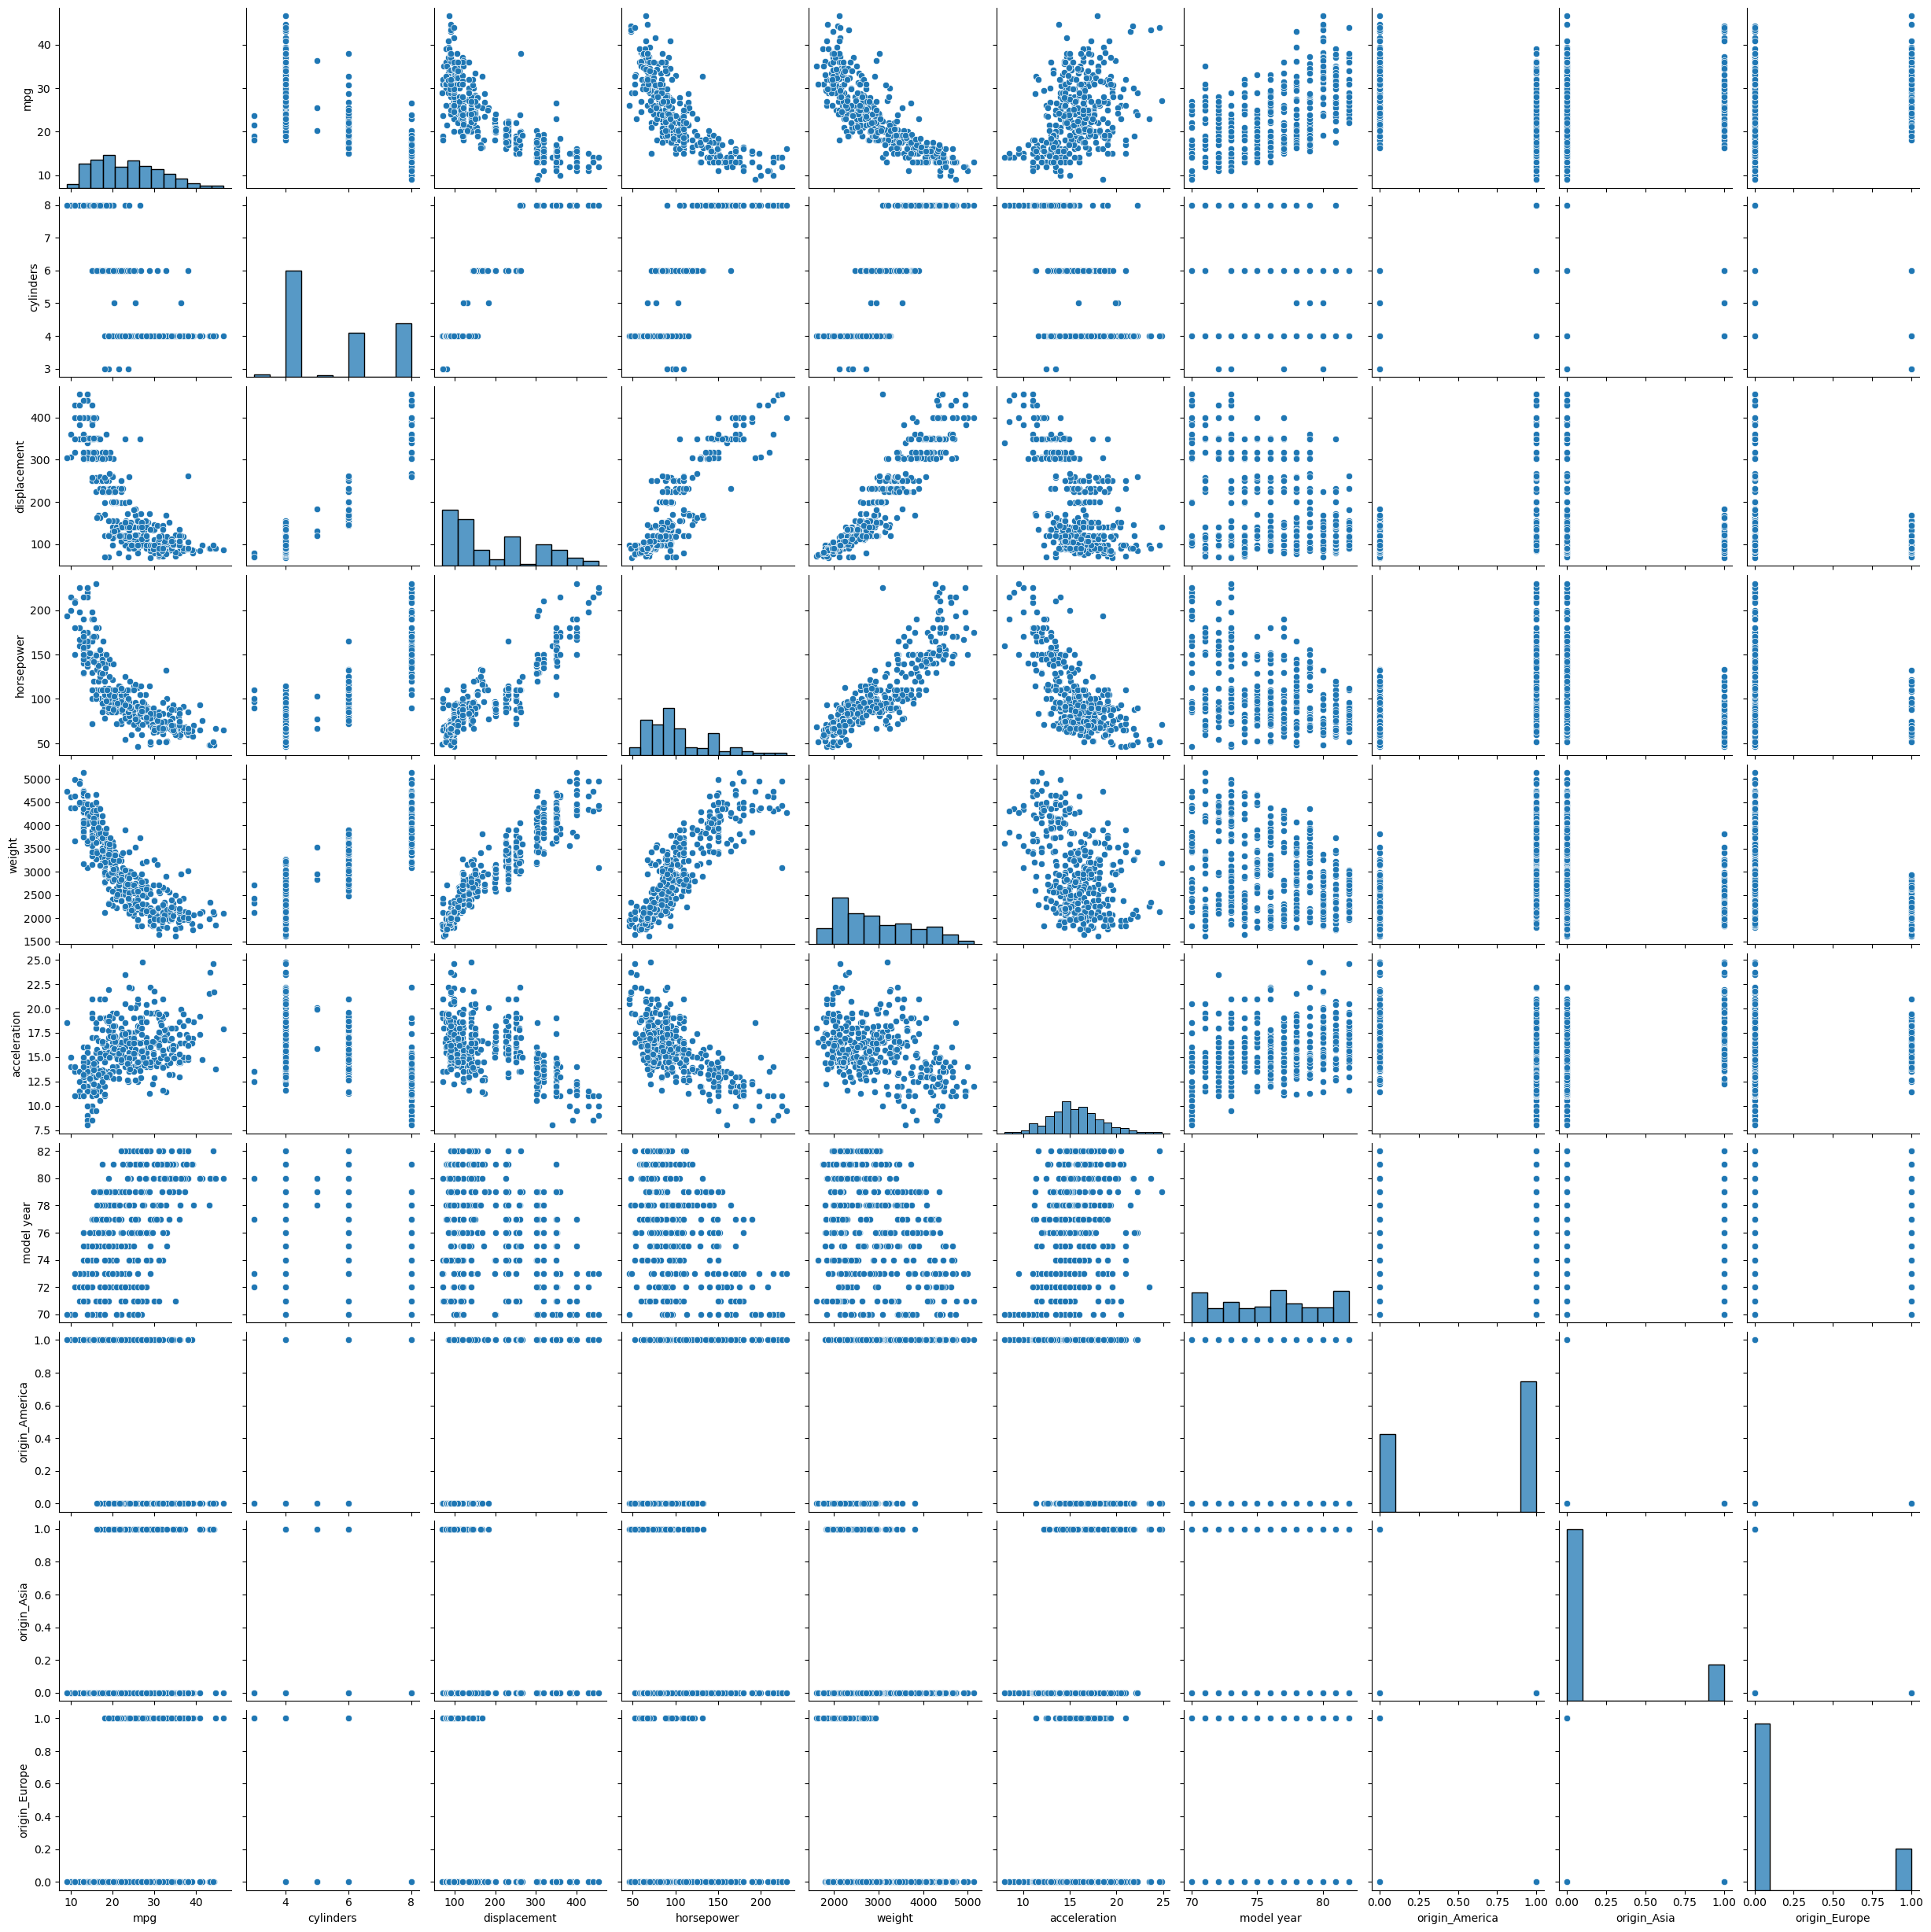

In [42]:
sns.pairplot(df)

In [21]:
### Split Data :-
Y = df["mpg"]
X = df.drop(["mpg"], axis = 1)

In [22]:
## Split into train & test data :-
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1)

In [23]:
### Fit Linear Model :-
model1 = LinearRegression()

In [27]:
model1.fit(X_train, Y_train)

LinearRegression()

In [28]:
model1.score(X_train, Y_train)

0.8141025501610559

In [29]:
model1.score(X_test, Y_test)

0.8433135132808829

### Difference between Train & Test data is of 3%.
### And it is less than 5%, so it means our model is working fine.

# Exploring new dataset :- Concrete 

In [31]:
DF = pd.read_csv("concrete.csv")

In [32]:
DF

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29
5,255.0,0.0,0.0,192.0,0.0,889.8,945.0,90,21.86
6,166.8,250.2,0.0,203.5,0.0,975.6,692.6,7,15.75
7,251.4,0.0,118.3,188.5,6.4,1028.4,757.7,56,36.64
8,296.0,0.0,0.0,192.0,0.0,1085.0,765.0,28,21.65
9,155.0,184.0,143.0,194.0,9.0,880.0,699.0,28,28.99


In [34]:
DF.sample(10)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
814,165.0,128.5,132.1,175.1,8.1,1005.8,746.6,28,46.39
101,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
1023,141.3,212.0,0.0,203.5,0.0,971.8,748.5,7,10.39
776,540.0,0.0,0.0,173.0,0.0,1125.0,613.0,180,71.62
801,297.2,0.0,117.5,174.8,9.5,1022.8,753.5,100,56.74
816,469.0,117.2,0.0,137.8,32.2,852.1,840.5,28,66.90
140,262.0,111.0,86.0,195.0,5.0,895.0,733.0,28,33.72
954,166.1,0.0,163.3,176.5,4.5,1058.6,780.1,14,25.48
641,331.0,0.0,0.0,192.0,0.0,1025.0,821.0,3,14.31
107,281.0,0.0,0.0,186.0,0.0,1104.0,774.0,7,14.50


In [56]:
DF.shape

(1030, 9)

In [36]:
DF.dtypes

cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float64
dtype: object

In [37]:
DF.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [39]:
DF.describe(include = "all")

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


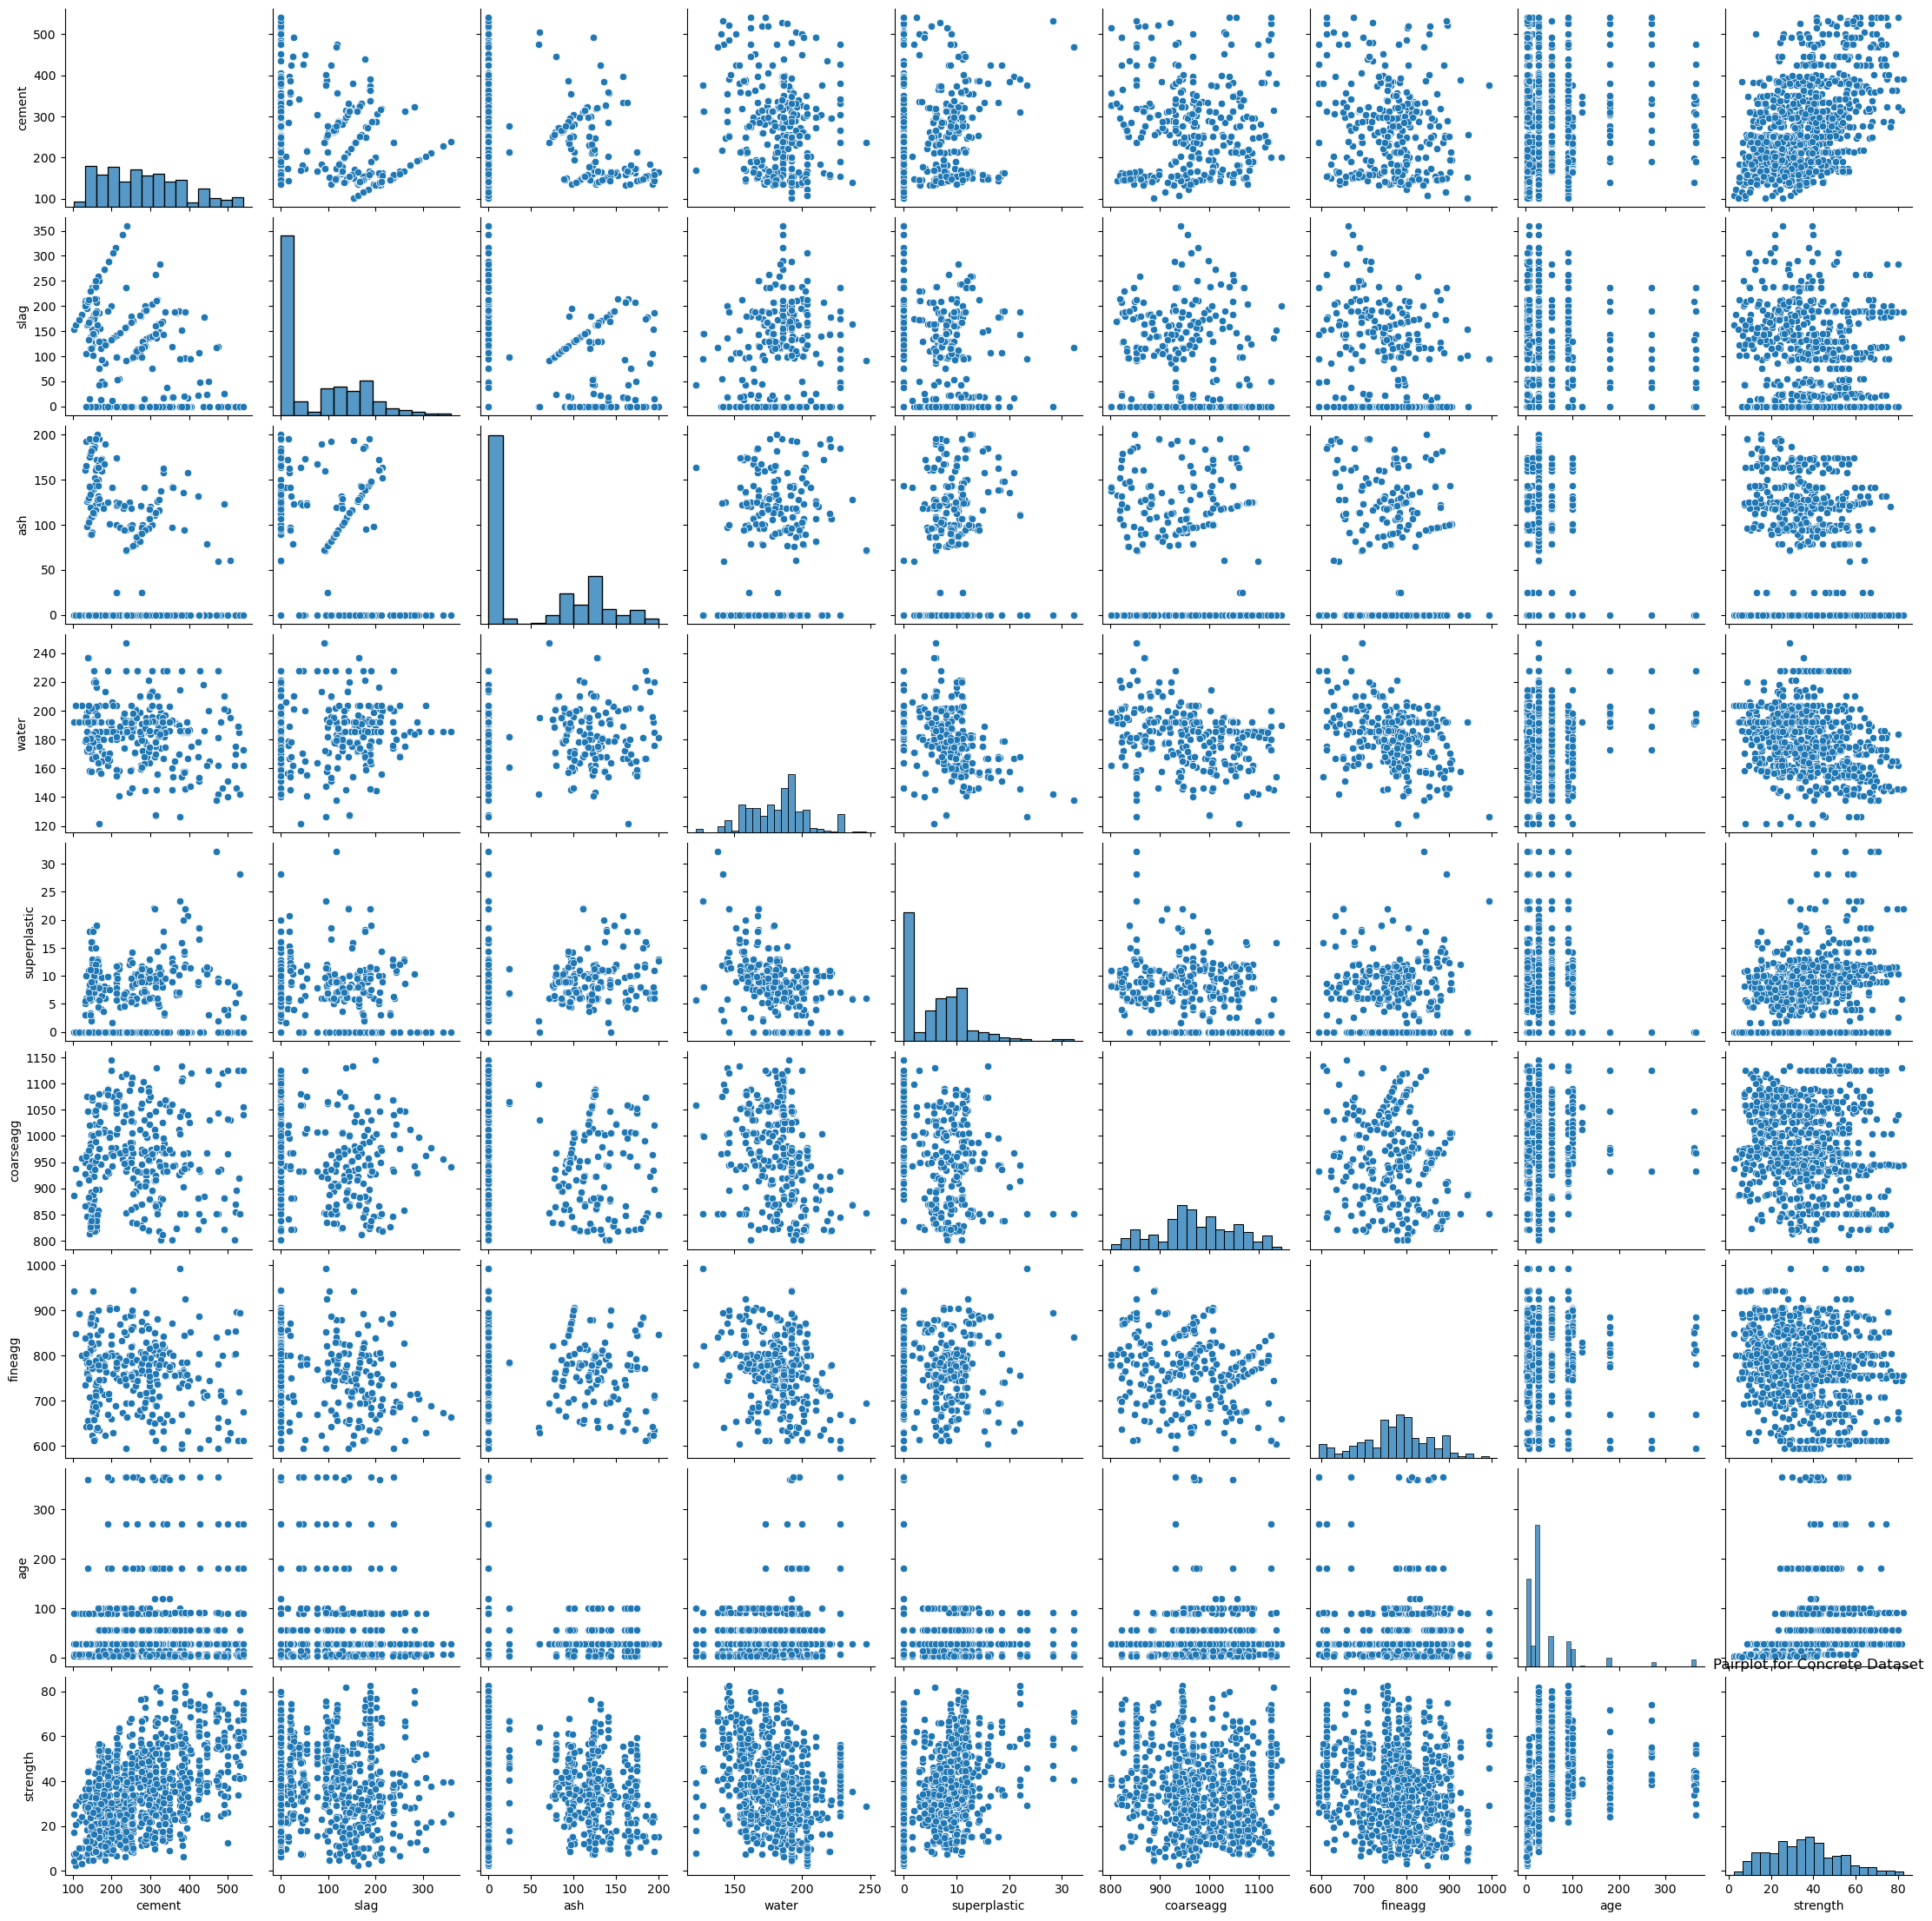

In [41]:
### Pairplot :-
sns.pairplot(DF)
plt.title("Pairplot for Concrete Dataset")
plt.show()

## Split Data :-

In [45]:
Y = DF["strength"]
X = DF.drop(["strength"], axis = 1)

## Split into Train & Test Data :-

In [47]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1)

## Fit Linear Model :-

In [49]:
model1 = LinearRegression()

In [50]:
model1.fit(X_train, Y_train)

LinearRegression()

In [51]:
model1.score(X_train, Y_train)

0.603148754063023

In [52]:
model1.score(X_test, Y_test)

0.6339136715208276

### Difference between Train & Test data is of 3%.
### And it is less than 5%, so it means our model is working fine.

In [10]:
print("END for now")

END for now
